# Assignment 2: ML Engineering 2

In [1]:
# enter your name and UFL email address
name = 'Yang Bai'
email = 'baiyang94@ufl.edu'

In [2]:
if name == 'enter your name' or email == 'enter your email':
    assert False, 'Enter your name & email first!'
else:
    print('Assignment 2 -- name: {}, email: {}\n'.format(name, email))
    
    # Load packages we need
    import sys
    import os
    import time

    import numpy as np
    import pandas as pd
    import sklearn

    from matplotlib import pyplot as plt
    plt.rcParams.update({'font.size': 16})

    # Let's check our software versions
    print('### Python version: ' + __import__('sys').version)
    print('### NumPy version: ' + np.__version__)
    print('### Scikit-learn version: ' + sklearn.__version__)
    print('------------')


    # load our packages / code
    sys.path.insert(1, '../common/')
    import utils
    import plots

Assignment 2 -- name: Yang Bai, email: baiyang94@ufl.edu

### Python version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
### NumPy version: 1.19.5
### Scikit-learn version: 0.23.1
------------


In [3]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.
seed = 42

# deterministic seed for reproducibility
##rng = np.random.default_rng(seed)  # best practice but not fully implemented in scikit-learn
np.random.seed(seed)

prop_vec = [16, 2, 2]

## Part 1: Loading and Pre-processing Data

### Loading data

In [4]:
### In this case, we'll directly load the Adult dataset pre-processed in a similar way as for assignment 1
### and we'll immediately split it into train, test, validation.

train_x, train_y, test_x, test_y, val_x, val_y, features, labels = utils.load_preproc_adult(prop_vec=prop_vec, seed=seed)

In [5]:
# check that we have what we expect
print('Training: {}, {}'.format(train_x.shape, train_y.shape))
print('Test: {}, {}'.format(test_x.shape, test_y.shape))
print('Validation: {}, {}'.format(val_x.shape, val_y.shape))

Training: (36178, 88), (36178,)
Test: (4523, 88), (4523,)
Validation: (4521, 88), (4521,)


In [6]:
# print features and labels
print('Features: {}'.format(features))
print('Labels: {}'.format(labels))

# as you can see this the one-hot encoded version of the data with proper names for the columns/features.

Features: ['age', 'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4', 'workclass_5', 'workclass_6', 'workclass_7', 'education-num', 'marital-status_0', 'marital-status_1', 'marital-status_2', 'marital-status_3', 'marital-status_4', 'marital-status_5', 'marital-status_6', 'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3', 'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7', 'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11', 'occupation_12', 'occupation_13', 'relationship_0', 'relationship_1', 'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5', 'race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'sex_0', 'sex_1', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country_0', 'native-country_1', 'native-country_2', 'native-country_3', 'native-country_4', 'native-country_5', 'native-country_6', 'native-country_7', 'native-country_8', 'native-country_9', 'native-country_10', 'native-country_11', 'native-c

In [7]:
# Let's take a look at some rows of our training data just so we know what it looks like
print(train_x[2,:])
print(train_y[0:20])

[ 0.94207283  1.          0.          0.          0.          0.
  0.          0.          0.          1.12875281  0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
  1.          0.         -0.1467332  -0.21878026  0.7547014   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.        ]
[1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 

## [Task 1] (30 points) Let's tune hyperparameters! We will use scikit-learn in two ways to optimize hyperparameters of SVM: (1) grid search, (2) randomized search.

### [Task 1a] (10 points) Use GridSearchCV from scikit-learn to do a grid search for SVM hyperparameters. Note that this way will use cross-validation to find the best hyperparameters values and that we purposefully disable some warnings to avoid verbose output.

In [8]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 5], 'penalty': ['l1', 'l2']}
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warnings 
# Note: don't just do that without thinking in your own projects, warnings are there for a reason folks!
## (In this case, it's okay because it's for illustration, but obviously if the model doesn't converge in 
## some cases we may not find the true best hyperparams)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_grid_search(model, param_grid):
    
    # use the GridSearchCV class of scikit-learn to do a grid search on the provided grid (use 'model')
    # set accuracy as scoring function and return the output of fit() on the training data
    
    ###* put your code here (~2 lines) *###
    svm_cv = GridSearchCV(model, param_grid)
    svm_cv.fit(train_x, train_y)

#     print("Tuned Linear SVM Parameters: {}".format(svm_cv.best_params_))  
#     print("Best score is {}".format(svm_cv.best_score_))
    return svm_cv

gs_res = do_grid_search(model, param_grid)

### [Task 1b] (3 points) How many combination of hyperparameters were tested?

In [9]:
###* put your answer as comment here *###
#
# Answer: the number of combination of hyperparameters is 6.
# 

### [Task 1c] (2 points) What is the best combination of hyperparameters?

In [10]:
# Show the best combination of parameters found through the search 
# Hint: look at the documentation of GridSearchCV
###* put your code here (~2 lines) *###
# store this combination in 'gs_best_hyperparams' and print it

gs_best_hyperparams = gs_res.best_params_

print("Tuned Linear SVM Parameters: {}".format(gs_best_hyperparams))  
print("Best score is {}".format(gs_res.best_score_))

Tuned Linear SVM Parameters: {'C': 0.1, 'penalty': 'l1'}
Best score is 0.8485545091863879


### [Task 1d] (10 points) Use RandomizedSearchCV to do a search! We'll use a halfnormal distribution from Scipy to find values for C.

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import halfnorm

param_dist = dict(C=halfnorm(loc=0, scale=4.0), penalty=['l1', 'l2'])
model = LinearSVC(max_iter=1000, dual=False)

# We'll use this to avoid some annoying convergence warnings 
# Note: don't just do that in your own projects, warnings are there for a reason!
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def do_randomized_search(model, param_dist):
    # use the RandomizedSearchCV class of scikit-learn to do a randomized search (use 'model')
    # use accuracy as scoring function and return the result of fit() on the training data 
    # Also for reproducibility: set the random_state
    
    ###* put your code here (~2 lines) *###
    svm_cv = RandomizedSearchCV(model, param_dist)
    svm_cv.fit(train_x, train_y)
    return svm_cv
    
rs_res = do_randomized_search(model, param_dist)

### [Task 1e] (1 points) What is the best combination of hyperparameters?

In [12]:
# Show the best combination of parameters found through the randomized search 
###* put your code here (~1 line) *###
rs_best_hyperparams = rs_res.best_params_

print("Tuned Linear SVM Parameters: {}".format(rs_best_hyperparams))  
print("Best score is {}".format(rs_res.best_score_))

Tuned Linear SVM Parameters: {'C': 0.1386087369103972, 'penalty': 'l1'}
Best score is 0.8485268581457299


### [Task 1f] (4 points) What are the pros and cons of a randomized search? Explain your answer. (A few sentences is okay.)

In [13]:
# what do you think are the pros and cons of a randomized search?
###* put your answer as comment here *###
#
# Answer: 
# Pros: Faster, especailly when the number of hyperparemeter is huge. 
# Because it doesn't test the full range of possibilities, and hence it can reduce unnecessary computation.
# Cons: It cannot guarantee to finded the optimal hyperparameter combination.
# Because it won't go through every combination.
#

## [Task 2] (10 points) Let's train the model and evaluate it!

In [14]:
# complete the function to calculate accuracy (value in [0,1] range)
def model_accuracy(model, x, true_y):
    ###* put your code here (~2 lines) *###
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

def evaluate_model(name, model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    print('{}: \n\t--- Training accuracy: {:.2f}%, Validation accuracy: {:.2f}%'.format(name, train_acc*100, val_acc*100))
    return

###* put your code here (~1 line) *### 
### Train a LinearSVC using the best hyperparameters found during the grid search in Task 1
### In addition you should also use: max_iter=10000, dual=False
### Use the training data (train_x, train_y)
### Hint: there is a way to pass the best hyperparameters object from Task 1b directly to the model object (i.e., without passing it one hyperparameter at a time)

svm = LinearSVC(max_iter=10000, dual=False).set_params(**gs_best_hyperparams).fit(train_x, train_y)

evaluate_model('LinearSVC(w/ best grid search hyperparams {})'.format(gs_best_hyperparams), 
               svm, train_x, train_y, val_x, val_y)

LinearSVC(w/ best grid search hyperparams {'C': 0.1, 'penalty': 'l1'}): 
	--- Training accuracy: 84.99%, Validation accuracy: 84.67%


## [Task 3] (30 points) Manual Hyperparameter Optimization (i.e., without using scikit-learn's to do the search for us)!

### [Task 3a] (10 points) Complete the code below to do a grid search manually. In this case you cannot use GridSearchCV, you must train and evaluate the model on each combination of hyperparameter values.

In [15]:
## we are allowed to use the following from scikit-learn
from sklearn.model_selection import ParameterGrid 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

hyperparams_vals = {'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'chebyshev'],
                    'n_neighbors': [1, 3, 5, 7, 11, 51]}

grid = ParameterGrid(hyperparams_vals)

trsub_size = 5000
trsub_x = train_x[:trsub_size,:]
trsub_y = train_y[:trsub_size]

## iterate over the entire grid. In each case, train a KNN classifier with the given hyperparameters (on the training subset 'trsub')
# and measure accuracy on both the training subset data and the validation data!
# note: we use a subset of the training data to speed up the process a bit
for i, hyperparams in enumerate(list(grid)):
    
    ###* put your code here  (~ 5 lines) *###
    ### In each iteration of the loop you should train a KNeighborsClassifier using 'hyperparams' as hyperparameters
    ### You should train the model on 'trsub_x' and 'trsub_y'!
    ### Once your model is trained, compute the accuracy on trsub (training accuracy) and on val (validation accuracy) 
    ### store the results in 'train_acc' and 'val_acc' respectively
    knn = KNeighborsClassifier().set_params(**hyperparams).fit(trsub_x, trsub_y)
    train_acc = model_accuracy(knn, trsub_x, trsub_y)
    val_acc = model_accuracy(knn, val_x, val_y)
    
    ## This will print information about the grid search as it progresses
    print('Iter {}, hyperparams: {}\n \t-> train accuracy: {:.2f}%, val accuracy: {:.2f}%'.
              format(i, hyperparams, 100*train_acc, 100*val_acc))

Iter 0, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
 	-> train accuracy: 99.10%, val accuracy: 79.25%
Iter 1, hyperparams: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
 	-> train accuracy: 99.10%, val accuracy: 79.25%
Iter 2, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
 	-> train accuracy: 89.62%, val accuracy: 81.53%
Iter 3, hyperparams: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
 	-> train accuracy: 99.16%, val accuracy: 80.71%
Iter 4, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
 	-> train accuracy: 87.56%, val accuracy: 81.80%
Iter 5, hyperparams: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
 	-> train accuracy: 99.16%, val accuracy: 81.09%
Iter 6, hyperparams: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
 	-> train accuracy: 86.96%, val accuracy: 82.06%
Iter 7, hyperparams: {'metric': 'euclidean', 'n_neig

### [Task 3b] (5 points) Answer the following questions. (A few sentences is fine.)
### What combination of hyperparameters would you use and why? Is the training accuracy useful when doing hyperparameter tuning? Why or why not?

In [16]:
# What combination of hyperparameters would you use and why?
###* put your answer as comment here *###
#
# Answer: 
# The conbination of hyperparameters that I would use is: 
# {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
# Because under this conbination of hyperparameter, the KNN model gets the heightest validation accuracy 
# according to the above results.
#

In [17]:
# Is the training accuracy useful when doing hyperparameter tuning? Why or why not?
###* put your answer as comment here *###
#
# Answer: 
# Training accuracy is not super useful for doing hyperparameter tuning. 
# Because we want to find the combination of hyperparameter that can give us the best generalization, i.e. 
# the heighest accuracy over the new data (the validation data here).
# But training accuracy along with validatoin accuracy can help us check which combination of hyperparameter 
# will cause overfitting, and hence gives us a better insight of these hyperparameters.
#

### [Task 3d] (10 points) Answer the following questions. (A few sentences is fine.)
### Observe what happens when weights changes from 'uniform' to 'distance'? Provide a plausible explanation for this.

In [18]:
# What do you observe in terms of the training and validation accuracies when the weights change from 'uniform' to 
# 'distance'?
###* put your answer as comment here *###
#
# Answer: 
# I find that when the weights change from 'uniform' to 'distance', in most cases,
# the accuracy of training set increased a lot, 
# while the accuracy of the validation set drops a little bit.
# 


## provide a plausible explanation for this phenomenon.
###* put your answer as comment here *###
#
# Answer: 
# When using the 'distance' weight, the model will give a weight over the vote of the k nearest neighbors based on
# their distance to the example. The closer the neighbor is the higher the weight it will get. This obviously
# will increase the accuracy of the training set because their always a correct neighbor in the model has 
# 0 distance with the input example, because the correct neighbor would be the input example itself. But this case
# does not hold in the validation set. Hence, the 'distance' weight makes the model overfit to the training set.
#

## If you were to train a KNN model would you set weights to 'uniform' or 'distance'? Why?
###* put your answer as comment here *###
#
# Answer: 
# I would set weights to 'uniform' because it gives better generalization, i.e. the heighest accuracy 
# over new data (validation data here).
# 

### [Task 3e] (5 points) Which hyperparameters (if any) have a significant impact on overfitting and why?

In [19]:
### According to the grid search you just performed, which hyperparameters seem to have significant impact on overfitting and why?
## Explain your reasoning and justify your answer!
###* put your answer as comment here *###
#
# Answer: 
# According to the grid search, looks like the hyperparameter 'weights' has significant impact on 
# overfitting. Because, in most cases, when changing 'weights' from 'uniform' to 'distance' while 
# keeping other hyperparameters the same, the training accracy increased a lot to over 99% but the validation
# accuracy drops a little bit which indicates the generalization goes down. It is an obvious phenomenon of 
# overfitting.
# 

## [Task 4] (30 points) Exploring Bias & Variance, Underfitting & Overfitting

### For this task, you *must* only use models (kNN or SVM) and hyperparameters that we have seen/used somewhere in this assignment!

### [Task 4a] (5 points) What is the irreducible error for this prediction task (income >=50k or <50k on Adult data)? Explain your reasoning.

In [20]:
###* put your answer as comment here *###
#
# Answer: 
# I think the irreducible error for this prediction task is about 15%. Because the heightest validation 
# accuracy we have ever had in the above experiments is 84.86% with SVM when using the best combination of 
# hyperparameter that we got using grid search.
# 

### For the rest of Task 4, we will assume that irreducible error (in the scale 1 - accuracy) is about 15%

### [Task 4b] (5 points) Train a high bias, low variance model. Show *and* explain why the model has high bias and low variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [21]:
###* Put your code here (~2 lines) *###
svm = LinearSVC(max_iter=10, dual=False, C = 0.1).fit(train_x[:, :10], train_y)
evaluate_model('LinearSVC(w/ high bias, low variance.)', 
               svm, train_x[:, :10], train_y, val_x[:, :10], val_y)

###* put your answer as comment here *###
# 
# Answer: 
# This model has a relatively low training accuracy(77.90%) and a very close validation 
# accuracy(77.35%). This indicats that this model is underfitting but it generalizes well. 
# Hence, we can tell this is a high bias low variance model.
# 

LinearSVC(w/ high bias, low variance.): 
	--- Training accuracy: 77.90%, Validation accuracy: 77.35%


### [Task 4c] (5 points) Train a low bias, high variance model. Show *and* explain why the model has low bias and high variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [22]:
###* Put your code here (~2 lines) *###
knn = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = 1, weights = 'distance').fit(trsub_x, trsub_y)
evaluate_model('KNeighborsClassifier(w/ low bias, high variance.)', 
               knn, trsub_x, trsub_y, val_x, val_y)

###* put your answer as comment here *###
#
# Answer: This model has a very high training accuracy(99.10%) and a much lower validation accuracy(77.93). This
# indicates that this model is overfitted. Hence, we can tell this is a low bias, high variance model.
# 

KNeighborsClassifier(w/ low bias, high variance.): 
	--- Training accuracy: 99.10%, Validation accuracy: 77.93%


### [Task 4d] (5 points) Train a low bias, low variance model. Show *and* explain why the model has low bias and low variance! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [23]:
###* Put your code here (~2 lines) *###
svm = LinearSVC(max_iter=10000, dual=False, C = 0.1).fit(train_x, train_y)
evaluate_model('LinearSVC(w/ low bias, low variance.)', 
               svm, train_x, train_y, val_x, val_y)


###* put your answer as comment here *###
#
# Answer: Given that the irreducibel error is 15%. A 85.06% training accuracy and a 84.67% validation accuracy are
# both very high and close, which means that this model has a low bias and a low varicance.
#

LinearSVC(w/ low bias, low variance.): 
	--- Training accuracy: 85.06%, Validation accuracy: 84.67%


### [Task 4e] (5 points) Can you train a high bias, high variance model. If so how? If not why not?

In [24]:
###* Put your code here (if applicable) *###


###* put your answer as comment here *###
#
# Answer: I don't think that I can train such a model that has high bias and high variance at the same time.
# Because high bias means underfitting, and it means the model cannot even properly extract/utilize the features
# in the training set to make prediction, so I don't think it is realistic to create a high biased model that also 
# has high variance.
# 

### [Task 4f] (5 points) Train a badly *underfitted* model. The accuracy should be below 55%! (Use evaluate_model() to calculate and display training accuracy and validation accuracy.)

In [25]:
###* Put your code here (~2 lines) *###

knn = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = 11, weights = 'distance').fit(trsub_x[:, 2:3], trsub_y)
evaluate_model('KNeighborsClassifier(badly underfitted)', 
               knn, trsub_x[:, 2:3], trsub_y, val_x[:, 2:3], val_y)



KNeighborsClassifier(badly underfitted): 
	--- Training accuracy: 26.94%, Validation accuracy: 28.29%


## [CIS6930 Additional Task -- Task 5] (25 points): Variance, Overfitting, Agreement Rate

### Suppose we have two models and want to compare them and instead of comparing them in terms of how good the models are, we care about whether the models have learned a similar relationship between features and label? One way we can measure this is using agreement rate: we use both models to make predictions on a separate dataset and then measure what proportion of those predictions are identical.

### Variance is the tendency to learn non-existing/wrong relationships between features and labels based on the idiosyncracies of the training data. So intuitively, if two models are trained on disjoint but randomly selected subsets of the training data, then if the variance is high the agreement rate between the two models should be low. So, we can try to measure variance by measuring agreement rate. But does this work? This is what you will explore experimentally in this task. (Note that overfitting and variance are related but are not the same thing.)

### [Task 5a] (5 points) Implement an overfitting measure and the agreement rate metric.

In [26]:
### We'll define two metrics, one for overfitting and the other for agreement rate

## for this assignment we define overfitting measure as the max between 0 and 
## the difference between training accuracy and validation accuracy
def overfitting_measure(train_acc, val_acc):
    ###* put your code here (~1 line) *###
    ### your code should return the maxmimum between: 0 and training accuracy - validation accuracy
    return max(0, train_acc - val_acc)



## the agreement rate is the proportion of identical prediction of both models on a separate dataset
## note: we don't care if the predictions are correct, we only care how often they are the same!
def agreement_rate(m1_preds, m2_preds):
    assert m1_preds.shape == m2_preds.shape
    
    ###* put your code here (~1 line) *###
    ### your code should return the proportion of identical predictions in m1_preds and m2_preds
    ### note: the agreement rate is a value in [0, 1] so make sure your code returns values in the same range!
    
    return (1 - np.count_nonzero((m1_preds - m2_preds)) / len(m1_preds))


In [27]:
from sklearn.base import clone

def eval_accuracy(model, train_x, train_y, val_x, val_y):
    train_acc = model_accuracy(model, train_x, train_y)
    val_acc = model_accuracy(model, val_x, val_y)
    
    return train_acc, val_acc

def measure_overfitting_agreement(model, train_x, train_y, trsz, val_x, val_y):
    m1 = clone(model)
    m2 = clone(model)
    
    n = train_x.shape[0]
    assert n/2 >= trsz and trsz > 0
    
    rng = np.random.default_rng()
    pi = rng.permutation(n)
    pi1 = pi[0:trsz]
    pi2 = pi[trsz:2*trsz]
    
    m1.fit(train_x[pi1], train_y[pi1])
    m2.fit(train_x[pi2], train_y[pi2])
    
    train_acc, val_acc = eval_accuracy(m1, train_x[pi1], train_y[pi1], val_x, val_y)
    m1_overfit =  np.maximum(0, train_acc - val_acc)
    
    train_acc, val_acc = eval_accuracy(m2, train_x[pi2], train_y[pi2], val_x, val_y)
    m2_overfit =  np.maximum(0, train_acc - val_acc)
    
    m1_val_pred = m1.predict(val_x)
    m2_val_pred = m2.predict(val_x)
    
    agr = agreement_rate(m1_val_pred, m2_val_pred)
    
    # for this task, we'll define our our overfitting measure as 
    # the average of the overfitting measure of the two models
    overfit = (m1_overfit + m2_overfit)/2.0 
    
    return overfit, agr

### [Task 5b] (10 points) Train SVM models on random subsets of the data with different C (regularization constant) and two different size for the training data. In each case, use measure_overfitting_agreement() defined above to train the models and compute overfitting and agreement.

In [28]:
Cs = np.logspace(-2,3,200)
training_sizes = [100, 200]

###* put your code here *###
### your code should use 'SVC(C=<value from Cs>, kernel='linear')' as model instances
### You should invoke measure_overfitting_agreement() to get the agreement rate and overfitting measure 
### (do this for all values in 'Cs' and both training sizes)
### and store the results in some array(s) of your choice so that you can plot this for Task 5c

overfit100_array = np.array([])
agr100_array = np.array([])
overfit200_array = np.array([])
agr200_array = np.array([])
for c in Cs:
#     print('-------------------')
#     print("C = ", c)
    for trsz in training_sizes:
#         print("trsz: ", trsz)
        svm = SVC(C = c, kernel='linear')
        overfit, agr = measure_overfitting_agreement(svm, train_x, train_y, trsz, val_x, val_y)
        
#         print("overfit: ", overfit)
#         print("\n################\n")
#         print("agr: ", agr)
#         break
        
        if trsz == 100:
            overfit100_array = np.append(overfit100_array, overfit)
            agr100_array = np.append(agr100_array, agr)
        else:
            overfit200_array = np.append(overfit200_array, overfit)
            agr200_array = np.append(agr200_array, agr)

# print("overfit100_array: ", overfit100_array)
# print("\n################\n")
# print("agr100_array: ", agr100_array)

# print("\n################\n")

# print("overfit200_array: ", overfit200_array)
# print("\n################\n")
# print("agr200_array: ", agr200_array)

### [Task 5c] (5 points) Plot overfitting vs disagreement rate as a scatter plot for both training sizes

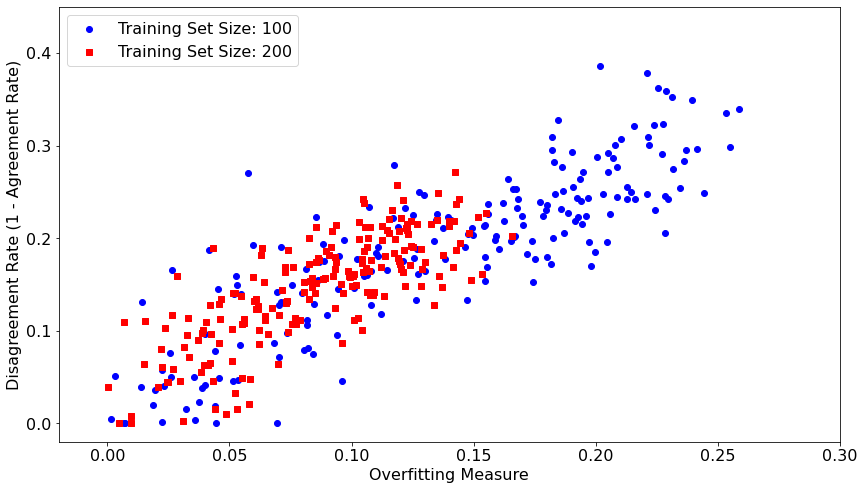

In [29]:
### Use matplotlib and supplement the provided code so it produces a single scatter plot of the two training set sizes
### with overfitting on the x-axis and *disagreement* (i.e., 1 - agreement rate) on the y-axis.
fig, ax = plt.subplots(figsize=(14,8))

###* put your code here (~2 lines) *###
### Invoke plt.scatter() first for Training Set Size: 100; use blue circle marker.
### Invoke plt.scatter() again this time for Training Set Size: 200; use red square marker.
plt.scatter(overfit100_array, 1 - agr100_array, marker='o', c= 'blue', label='Training Set Size: 100')
plt.scatter(overfit200_array, 1 - agr200_array, marker='s', c= 'red', label='Training Set Size: 200')


## sets the axis labels, limits, etc.
plt.xlabel('Overfitting Measure')
plt.ylabel('Disagreement Rate (1 - Agreement Rate)')
plt.xlim([-0.02, 0.3])
plt.ylim([-0.02, 0.45])

plt.legend(loc='upper left')
plt.show()

### [Task 5d] (5 points) What do you conclude?

In [30]:
# What do you conclude? Is agreement rate a possible way to measure overfitting? Can it be used to measure variance?
# Describe your general observation of the correlation between these measures.
# Hint: there is no single 'right' answer here, but there are many wrong answers!
###* put your answer as comment here *###
#
# Answer:
# From above figure, I can see that the Overfitting Measure and the Disagreement Rate are positively correlated, 
# which means that the higher the Overfitting，the lower the Agreement Rate. It means that the agreement rate
# is a possible way to measure overfitting.
# 
# However, I don't think agreement rate can be used to measure variance, because a low agreement rate could be 
# caused by many reasons like high bias or high variance, hence it does not have a certain relation with variance.
# 